### Monthly PSI Monitoring
---

In [1]:
import sys, os, json
sys.path.insert(1, "../../")
from src.combine import combine_data
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from smart_open import open
import pickle as pkl
import datetime as dt

import src.monitoring.refit as refit
import src.monitoring.monitoring as mntr
import src.monitoring.utils as mu

%matplotlib inline
plt.style.use('seaborn')

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [28]:
# modify this whenever we modify the model
prod_df_path_prev = "s3://sofi-data-science/jxu/monitoring/customer-risk-v1/2021-09/prev_test_df.parquet"
model_path = "s3://sofi-data-science/jxu/money-risk-models/customer-risk-model/models/customer_risk_target_no_giact_time_since_last_link.pkl"

In [20]:
today_str = str(dt.date.today())
YYYYMM = "-".join(today_str.split("-")[:2])
output_dir = f"s3://sofi-data-science/jxu/monitoring/customer-risk-v1/{YYYYMM}"
prod_df_path = os.path.join(output_dir, f"prod-data-{today_str}.parquet")

#### load previous data

In [22]:
prod_df_prev = pd.read_parquet(prod_df_path_prev)

2020-01-01    167293
Name: sample_date, dtype: int64


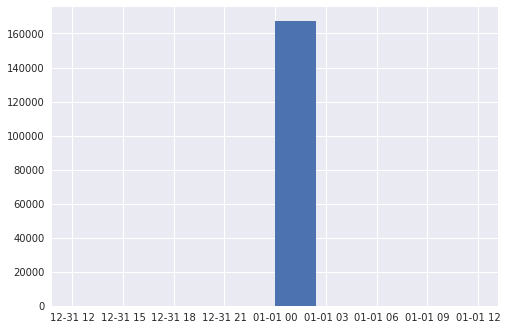

In [25]:
prod_df_prev.sample_date.hist()
print(prod_df_prev.sample_date.value_counts())

#### load current data

In [4]:
!pip install --index-url https://build.sofi.com/artifactory/api/pypi/pypi/simple sofiproto==release-1703
!pip install read_protobuf

Looking in indexes: https://build.sofi.com/artifactory/api/pypi/pypi/simple


#### Load Prev Prod data from S3

#### Query Current Prod Data

In [26]:
sys.path.insert(1, "../..")
from src.monitoring.download_customer_prod import download_customer_prod_data

download_customer_prod_data(prod_df_path)

querying money user data...
some data processing...


In [27]:
prod_df = pd.read_parquet(prod_df_path)

In [ ]:
# process prod df, and jog down some stats to make sure things are correct


#### preprocess and generate model score

In [30]:
with open(model_path, "rb") as f:
    customer_model = pkl.load(f)

In [3]:
!pip uninstall numpy -y
!pip install numpy==1.20.0 --no-cache-dir

Found existing installation: numpy 1.19.0
Uninstalling numpy-1.19.0:
  Successfully uninstalled numpy-1.19.0
     |████████████████████████████████| 15.3 MB 3.1 MB/s            


#### save to s3

In [ ]:
prod_df_prev.to_parquet(os.path.join(output_dir, f"prev_test_df.parquet"))
prod_df.to_parquet(prod_df_path)